# Quantitative and Categorical Variables: Titanic

The goal of this project is to investigate whether there are some correlations between the different aspects of physical and financial parameters and the survival rates of the Titanic passengers.

This data contains information about passengers on the Titanic, including the amount they paid for their fare and whether or not they survived (note: this is a subset of the full data available). 

Firstly let's import necessary libraries and upload `titanic.csv` to `titanic` variable. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
866,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
867,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
868,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
869,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Now let's calculate the difference in mean fare paid by those who survived and those who died. 

In [3]:
mean_fare_survived = titanic.groupby('Survived').Fare.mean()
mean_fare_survived

Survived
0    19.720801
1    37.802998
Name: Fare, dtype: float64

Result: Those who survived paid higher average fare. 

What about the difference in median fare for those who survived and those who died?

In [4]:
median_fare_survived = titanic.groupby('Survived').Fare.median()
median_fare_survived

Survived
0    10.4625
1    26.0000
Name: Fare, dtype: float64

Result: Meadian value of `Fare` is also higher for those who survived.

Now let's visualise this info on side-by-side box plots of fares by survival. Median will be shown as a quartile line and mean as `+`.

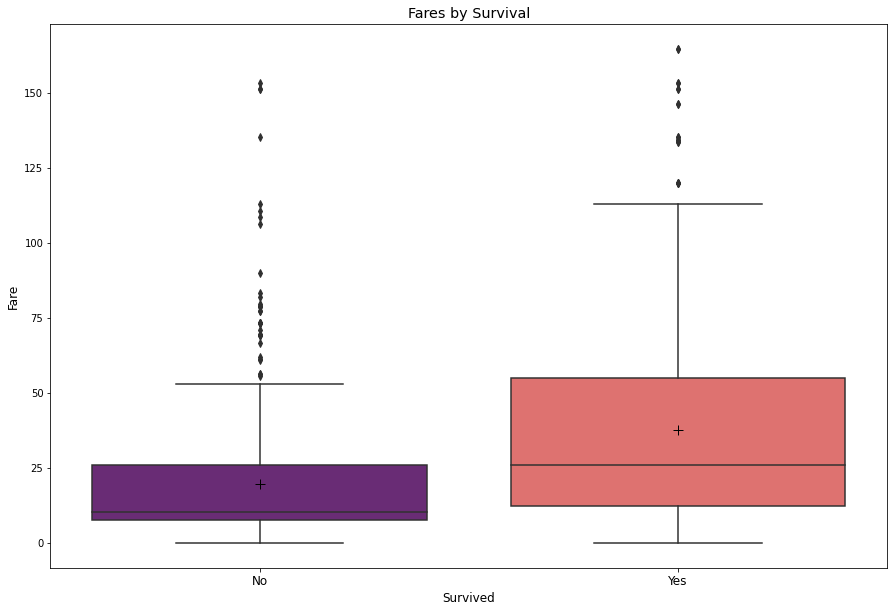

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(x= titanic.Survived, 
    y= titanic.Fare,
    palette='magma', 
    showmeans=True,
    meanprops={"marker": "+",
        "markeredgecolor": "black",
        "markersize": "10"})

ax.set_title('Fares by Survival', fontsize = 'x-large')
ax.set_xlabel('Survived', fontsize = 'large')
ax.set_ylabel('Fare', fontsize = 'large')
ax.set_xticklabels(['No', 'Yes'], fontsize = 'large')

plt.show()
plt.clf()

Let's create overlapping histograms of fares by survival.

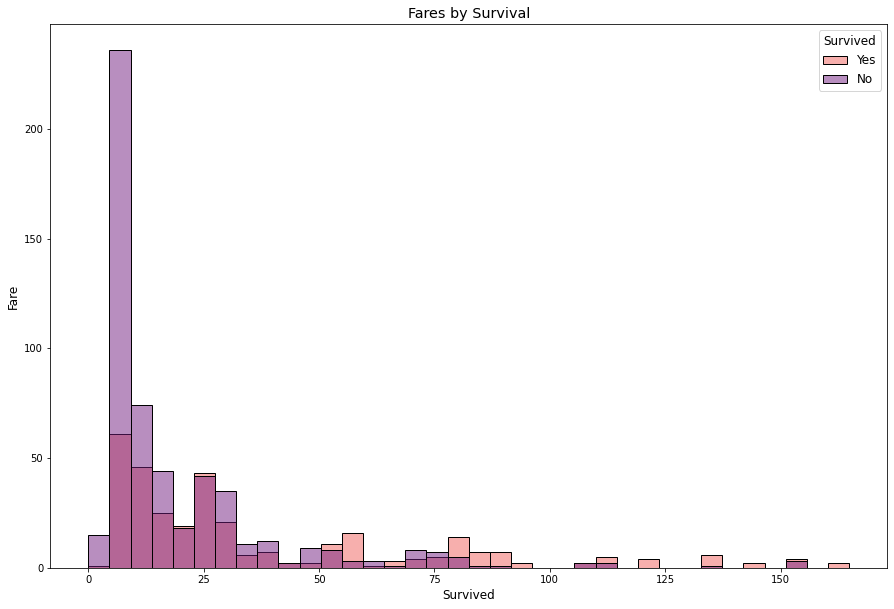

In [6]:
plt.figure(figsize = (15,10))
ax = sns.histplot(titanic, x=titanic.Fare, hue=titanic.Survived, stat="count", legend=False, palette='magma')

ax.set_title('Fares by Survival', fontsize = 'x-large')
ax.set_xlabel('Survived', fontsize = 'large')
ax.set_ylabel('Fare', fontsize = 'large')

plt.legend(title='Survived', title_fontsize='large', loc='upper right', labels=['Yes', 'No'], fontsize = 'large')
plt.show()


In [7]:
def visualise_heatmap(dataset_corr, corr_objects):
    # Prepare figure
    plt.figure(figsize = (21,12))

    # Make plot triangle
    mask = np.triu(np.ones_like(dataset_corr, dtype=bool))

    plt.title(' Correlations of ' + corr_objects, fontsize= 'x-large')
    plt.xticks(rotation=45)

    # Plot heatmap
    heatmap = sns.heatmap(dataset_corr, annot=True, vmax=1, vmin=-1, cmap='magma', mask=mask)
    return heatmap

<AxesSubplot:title={'center':' Correlations of different parameters of Titanic passengers'}>

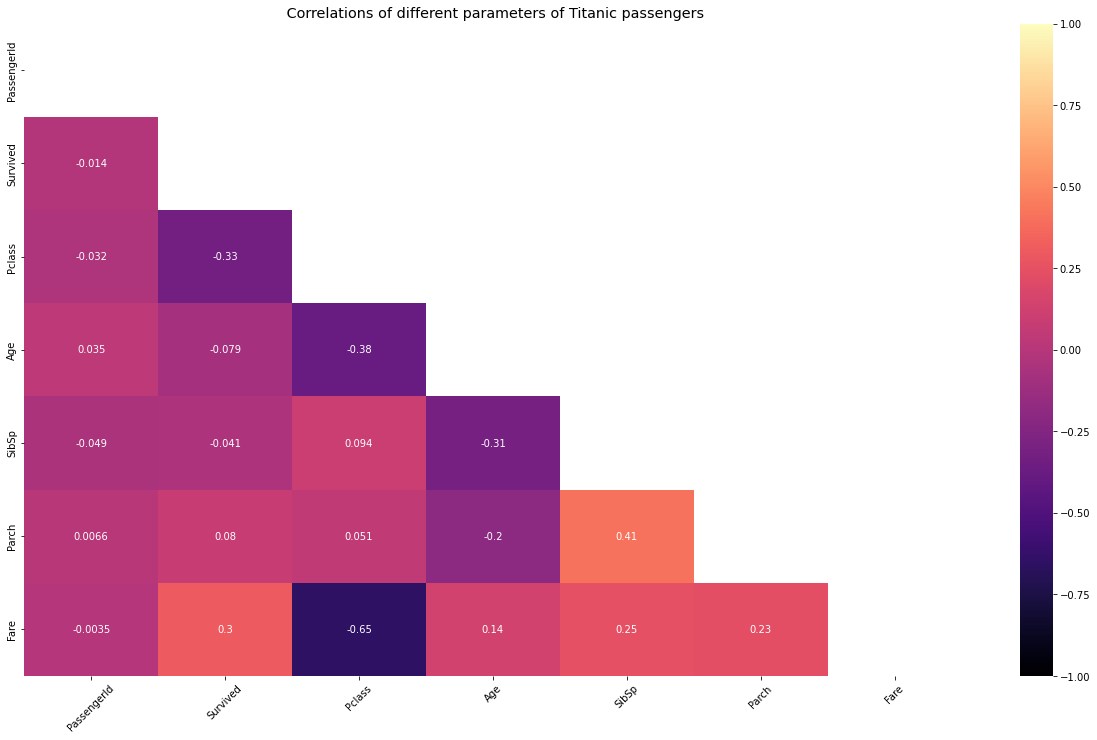

In [8]:
visualise_heatmap(titanic.corr(), 'different parameters of Titanic passengers') 

## Conclusion:

- In general, there are more survivors, with minor exceptions, among those who could afford to pay the higher fares.

- Among those, who had tickets with a price a bit higher than the cheapest one, the difference in the number of survivors is especially dramatic: almost 250 died and only around 60 survived. 

- Almost all, who had the cheapest tickets, died.